In [2]:
import numpy as np
import pandas as pd
from keras_facenet import FaceNet
from keras.preprocessing.image import load_img, img_to_array
from scipy.spatial.distance import cosine

In [3]:
df = pd.read_csv(r'C:\Users\jneed\Documents\projet2\clever_door_3\mega_faces_dataset.csv')
embedder = FaceNet()

In [4]:
# Define a function to extract embeddings from an image
def extract_embedding(image_path, model):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(160, 160), color_mode='rgb')
    image = img_to_array(image)
    # Extract the embedding using the model
    embedding = model.embeddings(np.array([image]))[0]
    # Convert the embedding to a DataFrame
    df = pd.DataFrame([embedding])

    return df

In [5]:
new_image_path = r"C:\Users\jneed\Documents\projet2\clever_door_3\01_buscemi.jpg"
df_new = extract_embedding(new_image_path, embedder)
df_new = df_new.drop(columns=[511])

1/1 [==============================] - 2s 2s/step


In [6]:
# Ensure the embeddings are in the same format and order
df_new.columns = df.columns[3:-1]

In [7]:
# Calculate the cosine similarity
df['similarity'] = df.iloc[:, 3:-1].apply(lambda row: cosine(df_new.iloc[0], row), axis=1)

In [8]:
# Store 'filename', 'filepath', and 'label' in a new DataFrame and add 'similarity'
df_result = df[df.columns[:3]].copy()
df_result['similarity'] = df['similarity']

In [9]:
# Sort by similarity and get the top 5
top_5 = df_result.nsmallest(5, 'similarity')

In [20]:
top_5

,filename,filepath,label,similarity
1093,not_allowed_99.jpg,Faces_Dataset_processed\not_allowed\not_allowe...,not_allowed,0.000000
98,allowed_18.jpg,Faces_Dataset_processed\allowed\allowed_18.jpg,allowed,0.444915
274,allowed_34.jpg,Faces_Dataset_processed\allowed\allowed_34.jpg,allowed,0.481775
5,allowed_05.jpg,Faces_Dataset_processed\allowed\allowed_05.jpg,allowed,0.483570
120,allowed_20.jpg,Faces_Dataset_processed\allowed\allowed_20.jpg,allowed,0.487700


In [11]:
top_5.iloc[0, 1]

'Faces_Dataset_processed\\not_allowed\\not_allowed_99.jpg'

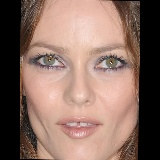

In [19]:
from IPython.display import Image

Image(top_5.iloc[0, 1])

In [ ]:
Image(top_5.iloc[2, 1])